In [1]:
noaanum = 11158

In [2]:
import os 
import glob

fname = f"/mnt/obsdata/isee_nlfff_v1.2/{noaanum}"
files = sorted(glob.glob(os.path.join(fname, '*.nc')))

In [3]:
file = files[0]
file

'/mnt/obsdata/isee_nlfff_v1.2/11158/11158_20110213_120000.nc'

In [21]:
from tool.metric import load_nc_file, calculate_derivative, draw_projection, find_max_within

In [5]:
x, y, z, Bx, By, Bz, Bx_pot, By_pot, Bz_pot = load_nc_file(file)

In [6]:
dx = x[1] - x[0]  # Mm
dy = y[1] - y[0]  # Mm
dz = z[1] - z[0]  # Mm

Lx = x[-1] - x[0]  # Mm
Ly = y[-1] - y[0]  # Mm
Lz = z[-1] - z[0]  # Mm

In [7]:
(
    B,
    norm_B,
    J,
    norm_J,
    JxB,
    norm_JxB,
    div_B,
    norm_div_B,
    laplacian_B,
    norm_laplacian_B,
    energy_density_B,
) = calculate_derivative(Bx, By, Bz, dx, dy, dz)

(
    B_pot,
    norm_B_pot,
    J_pot,
    norm_J_pot,
    JxB_pot,
    norm_JxB_pot,
    div_B_pot,
    norm_div_B_pot,
    laplacian_B_pot,
    norm_laplacian_B_pot,
    energy_density_B_pot,
) = calculate_derivative(Bx_pot, By_pot, Bz_pot, dx, dy, dz)

In [11]:
import numpy as np

In [33]:
normalized_norm_laplacian_B = np.divide(norm_laplacian_B, norm_B, where=norm_B!=0)

In [34]:
find_max_within(norm_laplacian_B, 5)

((172, 122, 5), 482.4102528029045)

In [39]:
find_max_within(normalized_norm_laplacian_B, 40)

((171, 216, 40), 0.17683258376972108)

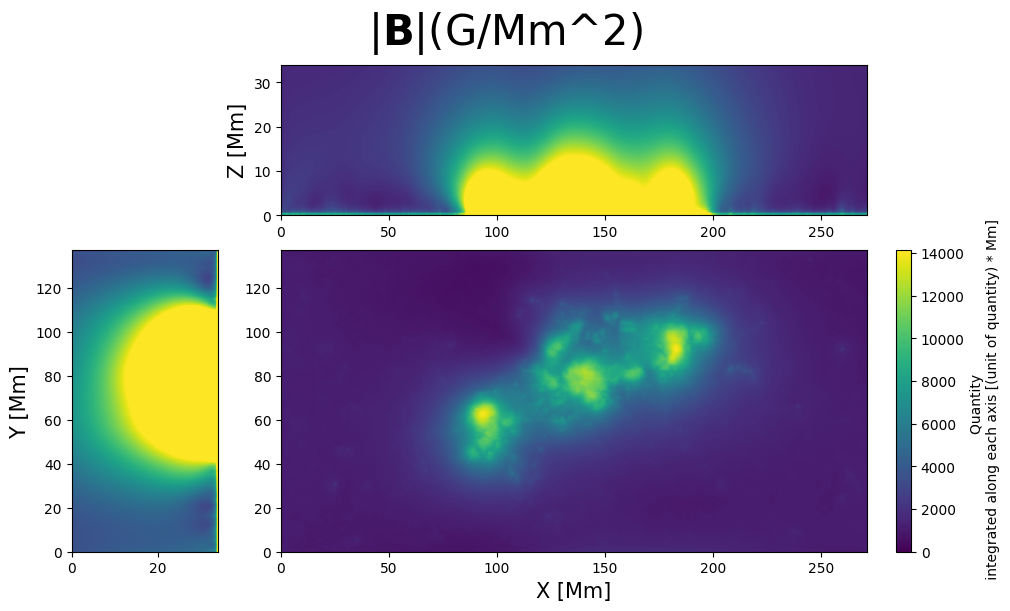

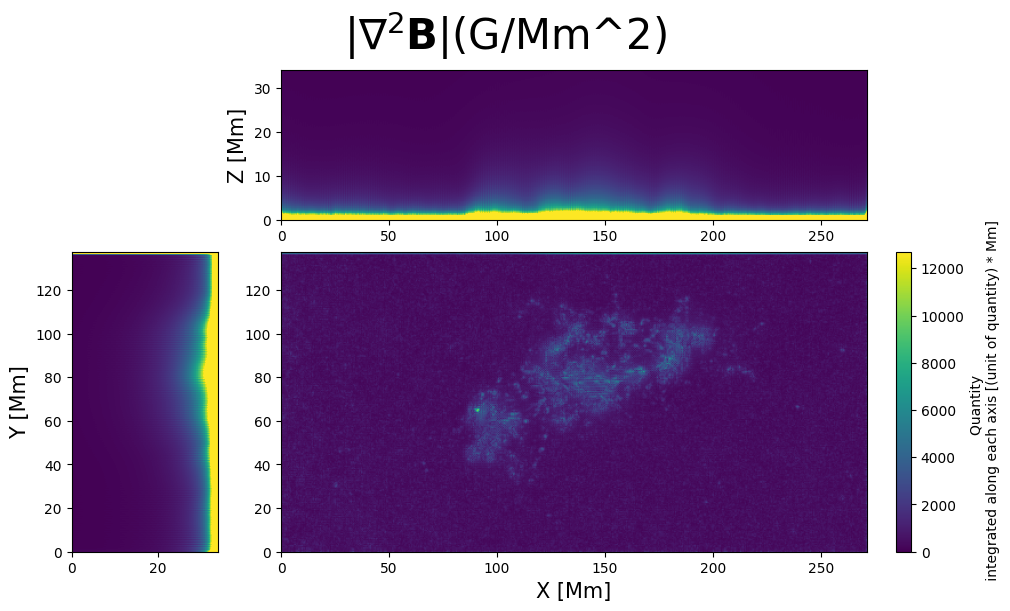

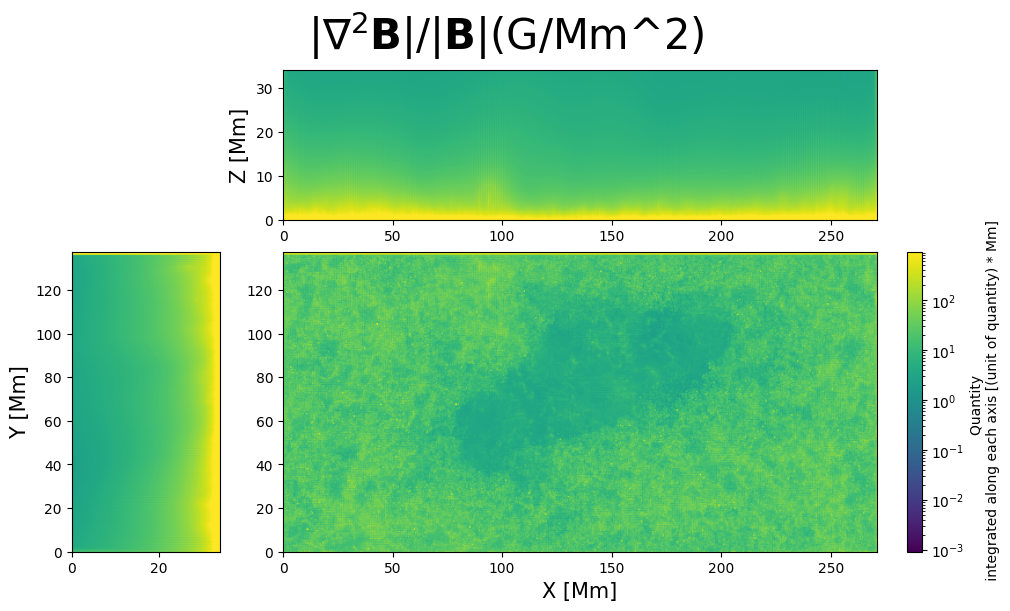

In [32]:
z_Mm = Lz//4

draw_projection(
    norm_B,
    r"$|\mathbf{B}|$" + "(G/Mm^2)",
    "",
    dx,
    dy,
    dz,
    Lx,
    Ly,
    Lz,
    z_Mm,
    log=False,
    savefig=False
)

draw_projection(
    norm_laplacian_B,
    r"$|\nabla^2 \mathbf{B}|$" + "(G/Mm^2)",
    "",
    dx,
    dy,
    dz,
    Lx,
    Ly,
    Lz,
    z_Mm,
    log=False,
    savefig=False
)


draw_projection(
    normalized_norm_laplacian_B,
    r"$|\nabla^2 \mathbf{B}|/|\mathbf{B}|$" + "(G/Mm^2)",
    "",
    dx,
    dy,
    dz,
    Lx,
    Ly,
    Lz,
    z_Mm,
    log=True,
    savefig=False
)